In [1]:
import numpy as np
import matplotlib.pyplot as plt
import gymnasium as gym
import os

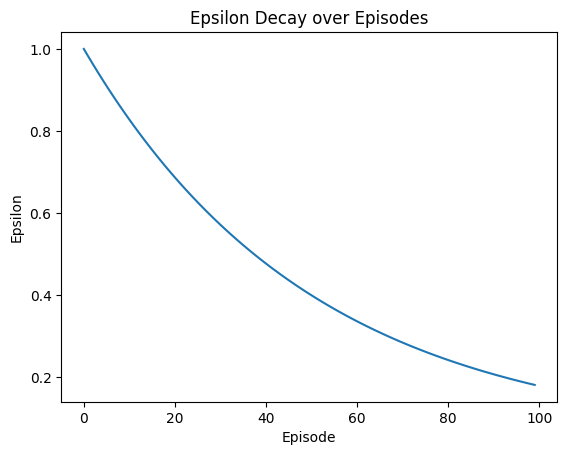

In [2]:
max_epsilon = 1.0
min_epsilon = 0.05
decay_rate = 0.02
episodes = 100

epsilons = [min_epsilon + (max_epsilon - min_epsilon) * np.exp(-decay_rate * ep) for ep in range(episodes)]

plt.plot(epsilons)
plt.xlabel('Episode')
plt.ylabel('Epsilon')
plt.title('Epsilon Decay over Episodes')
plt.show()

In [3]:
def q_function(q_table, state, action, reward, next_state, learning_rate, discount_rate):
  best_next_q_action = np.max(q_table[next_state, :])
  
  q_value = q_table[state, action] + learning_rate * (reward + discount_rate * best_next_q_action - q_table[state, action])

  return q_value

In [4]:
env = gym.make('FrozenLake-v1', render_mode='human')

n_states = env.observation_space.n
n_actions = env.action_space.n

file_path = 'q_table.txt'

if os.path.exists(file_path):
  print('Exist')
  q_table = np.loadtxt(file_path)
else:
  print('Create Q-Table')
  q_table = np.zeros((n_states, n_actions))  

learning_rate = 0.7
discount_rate = 0.95

episodes = 1000

for ep in range(episodes):
  state = env.reset()[0]
  finish = False

  epsilon = min_epsilon + (max_epsilon - min_epsilon) * np.exp(-decay_rate * ep)

  while not finish:
    # Epsilon-greedy policy
    if np.random.uniform(0, 1) < epsilon:
      action = np.random.choice(n_actions)  # Exploration -> explora de forma aleatória no intuito de aprender
    else:
      action = np.argmax(q_table[state, :])  # Exploitation -> toma a melhor decisão

    step_return = env.step(action)

    next_state = step_return[0]
    reward = step_return[1]
    finish = step_return[2]

    if finish == 1 and reward == 0:
      reward = -1

    q_value = q_function(q_table, state, action, reward, next_state, learning_rate, discount_rate)
    q_table[state, action] = q_value

    state = next_state

    # env.render()
  
  print(f'Ep {ep}')

  if reward == 1:
    print('Win')

env.close()

np.savetxt('q_table.txt', q_table)

Create Q-Table
Ep 0
Ep 1
Ep 2
Ep 3
Ep 4
Ep 5
Ep 6
Ep 7
Ep 8
Ep 9
